# Hyperbolic PDE's

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import numpy as np
import sympy as sp

In [2]:
L = 1  # length of string
N = 50 # number of chunks
c = 1.0 # speed
A = 0.1 # amplitude of "pluck"

past = 0
present = 1
future = 2

x = np.linspace(0,L,N)
dx = x[1] - x[0] # what is dx?

dt = 0.5*dx/c  # this ensures that dx/dt > c

yp = np.where(x<L/1.25, x*1.25*A/L, (L-x)*5*A/L)

y = np.zeros((3,N),float)

y[present] = yp
y[future] = np.zeros((1,N))

y

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00255102, 0.00510204, 0.00765306, 0.01020408,
        0.0127551 , 0.01530612, 0.01785714, 0.02040816, 0.02295918,
        0.0255102 , 0.02806122, 0.03061224, 0.03316327, 0.03571429,
        0.03826531, 0.04081633, 0.04336735, 0.04591837, 0.04846939,
        0.05102041, 0.05357143, 0.05612245, 0.0

<IPython.core.display.Javascript object>


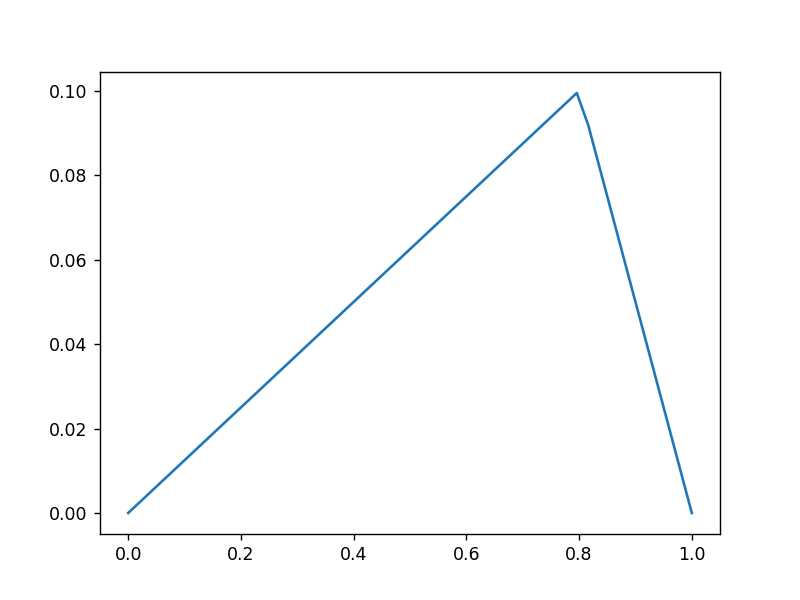

In [3]:
plt.plot(x,yp)

<IPython.core.display.Javascript object>


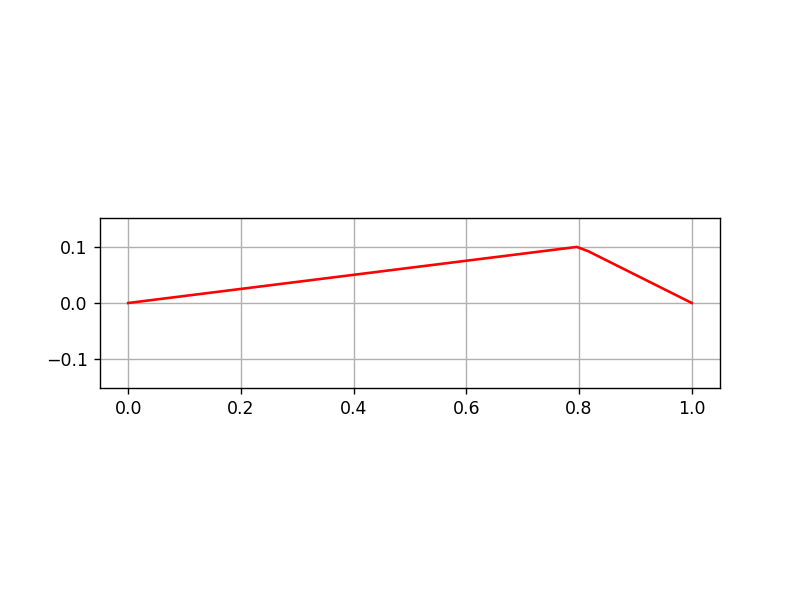

(-0.15, 0.15)

In [4]:
fig1, ax1 = plt.subplots()
ax1.plot(x,yp,'r-')
ax1.grid()
ax1.set_aspect('equal')
plt.ylim(-.15,0.15)

In [5]:
def doStep(y,isFirst=None, future=2, present=1, past=0):
    for i in range(1,N-1):
        if isFirst:
            y[future, i] = (2*y[present, i] + dt**2*c**2*(y[present,i-1] - 2*y[present,i] + y[present,i+1])/dx**2)/2.0
        else:
            y[future, i] = (2*y[present, i] - y[past, i] + dt**2*c**2*(y[present,i-1] - 2*y[present,i] + y[present,i+1])/dx**2)

    return y

In [6]:
y = np.zeros((3,N),float)

y[0] = yp

savedYs = []

for i in range(200):
    y = doStep(y, i==0, (i+1)%3, (i)%3, (i-1)%3)
    savedYs.append(np.copy(y[(i+1)%3]))

<IPython.core.display.Javascript object>


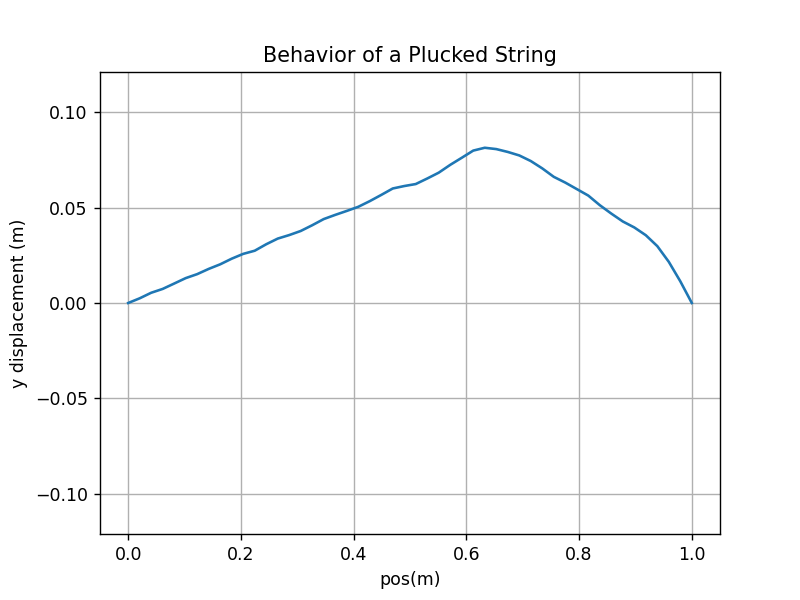

In [7]:
fig, ax = plt.subplots()
ax.grid()
#ax.set_aspect('equal')
plt.xlabel('pos(m)')
plt.ylabel('y displacement (m)')
plt.title('Behavior of a Plucked String')

l, = ax.plot([x[0],x[-1]],[-1.1*A,1.1*A]) # note that this initial plot is just to establish the frame size.

animate = lambda i: l.set_data(x, savedYs[i])

_ = ani.FuncAnimation(fig, animate, frames=len(savedYs), interval=10, repeat=True)

plt.show()

In [8]:
def fa_vec(x):
    
    return np.where(x<L/1.25, x*1.25*A/L, (L-x)*5*A/L)

def basis(x, n):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

In [9]:
def simpson_array(f, h):
    """

Use Simpson's Rule to estimate an integral of an array of
    function samples
    
    f: function samples (already in an array format)
    h: spacing in "x" between sample points
    
    The array is assumed to have an even number of elements.
    
    """
    if len(f)%2 != 0:
        raise ValueError("Sorry, f must be an array with an even number of elements.")
        
    evens =  f[2:-2:2]
    odds = f[1:-1:2]
    return (f[0] + f[-1] + 2*odds.sum() + 4*evens.sum())*dx/3.0

In [10]:
def braket(n):
    """
    Evaluate <n|f>
    """
    return simpson_array(basis(x,n)*fa_vec(x),dx)

<IPython.core.display.Javascript object>


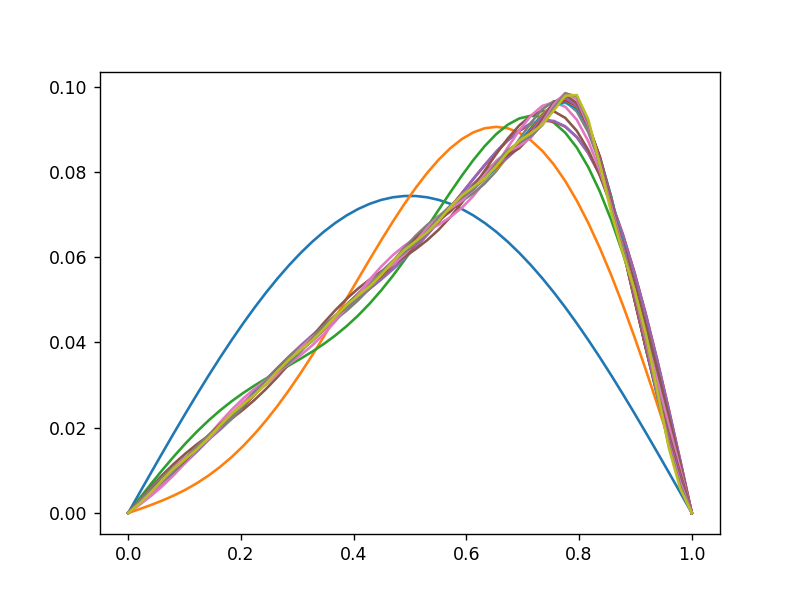

         n	      coef	coef(theory)
       ---	     -----	------------
         1	   0.05260	   0.05732
         2	  -0.02123	   0.00000
         3	   0.00937	  -0.00637
         4	  -0.00318	   0.00000
         5	  -0.00012	   0.00229
         6	   0.00160	   0.00000
         7	  -0.00189	  -0.00117
         8	   0.00151	   0.00000
         9	  -0.00085	   0.00071
        10	   0.00024	   0.00000
        11	   0.00017	  -0.00047
        12	  -0.00030	   0.00000
        13	   0.00019	   0.00034
        14	   0.00005	   0.00000
        15	  -0.00032	  -0.00025
        16	   0.00052	   0.00000
        17	  -0.00062	   0.00020
        18	   0.00060	   0.00000
        19	  -0.00050	  -0.00016


In [11]:
M=20
coefs = [0]
coefs_th = [0]
ys = [[]]
sup = np.zeros(N)
for n in range(1,M):
    coefs.append(braket(n))   # do numerical integral

    if n%2==0:
        coefs_th.append(0.0)
    else:
        coefs_th.append(4*A*np.sqrt(2*L)*(-1)**((n-1)/2.0)/(np.pi**2*n**2))  # compare theory
        
    ys.append(coefs[n]*basis(x,n))
    sup += ys[n]
    plt.plot(x,sup)

print("%10s\t%10s\t%10s" % ('n', 'coef','coef(theory)'))
print("%10s\t%10s\t%10s" % ('---','-----','------------'))

for n in range(1,M):
    print("%10d\t%10.5f\t%10.5f" % (n, coefs[n],coefs_th[n]))


In [12]:
k1 = np.pi/L
c = 1.0

omega1 = c*k1
T = 2*np.pi/omega1

def calcFourierSuperposition(t, nMax=M, singleTerm=None):
    #
    # get superposition at time `t`.
    #
    # if singleTerm is not None, only compute that single Term!
    #
    
    sup = np.zeros(N)
    
    if singleTerm is None:
        ys = [[]]
        for n in range(1,nMax):
            ys.append(coefs[n]*basis(x,n))
            sup += ys[n]*np.cos(omega1*n*t)
    else:
        sup += coefs[singleTerm]*basis(x,singleTerm)*np.cos(omega1*singleTerm*t)

    return sup

#
# Compute a solution with 20 terms
# 
savedYs = []
for t in np.linspace(0, T, 200):
    savedYs.append(calcFourierSuperposition(t))


<IPython.core.display.Javascript object>


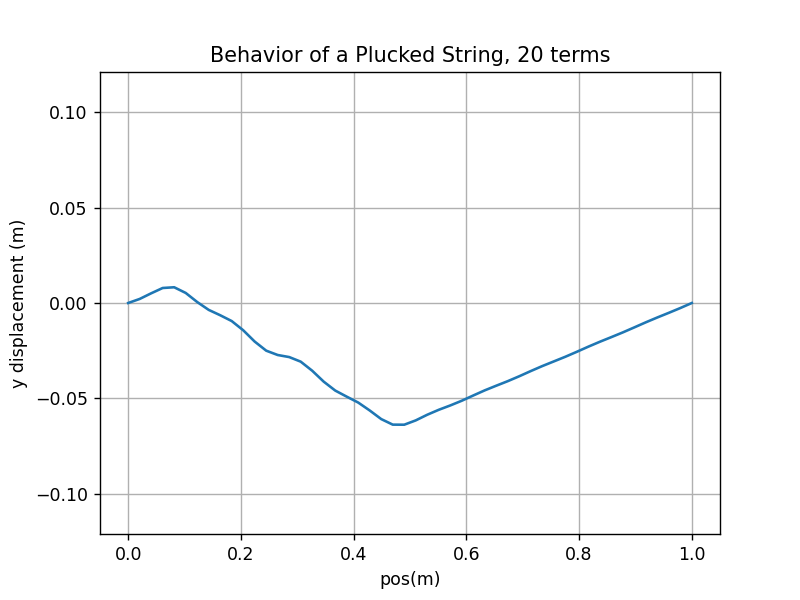

In [13]:
fig, ax = plt.subplots()
ax.grid()
#ax.set_aspect('equal')
plt.xlabel('pos(m)')
plt.ylabel('y displacement (m)')
plt.title('Behavior of a Plucked String, 20 terms')

l, = ax.plot([x[0],x[-1]],[-1.1*A,1.1*A]) # note that this initial plot is just to establish the frame size.

animate = lambda i: l.set_data(x, savedYs[i])

_ = ani.FuncAnimation(fig, animate, frames=len(savedYs), interval=10, repeat=True)

plt.show()